# Import data

In [98]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

#### As we see from above, no missing data and all are numeric values 

In [101]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


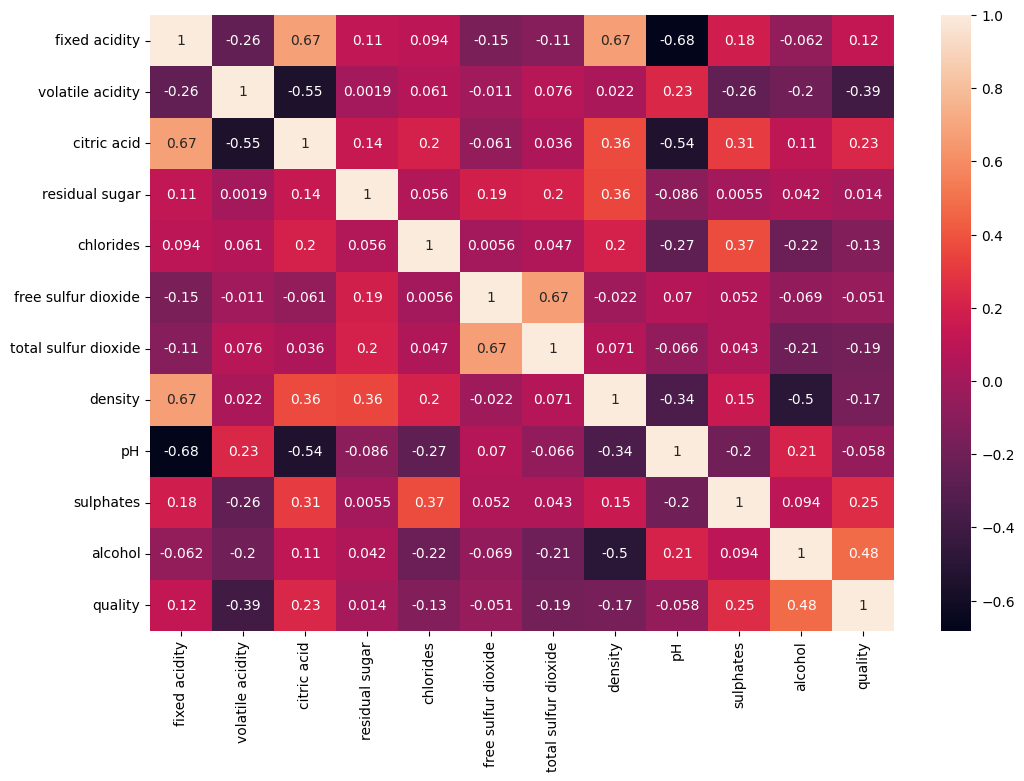

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

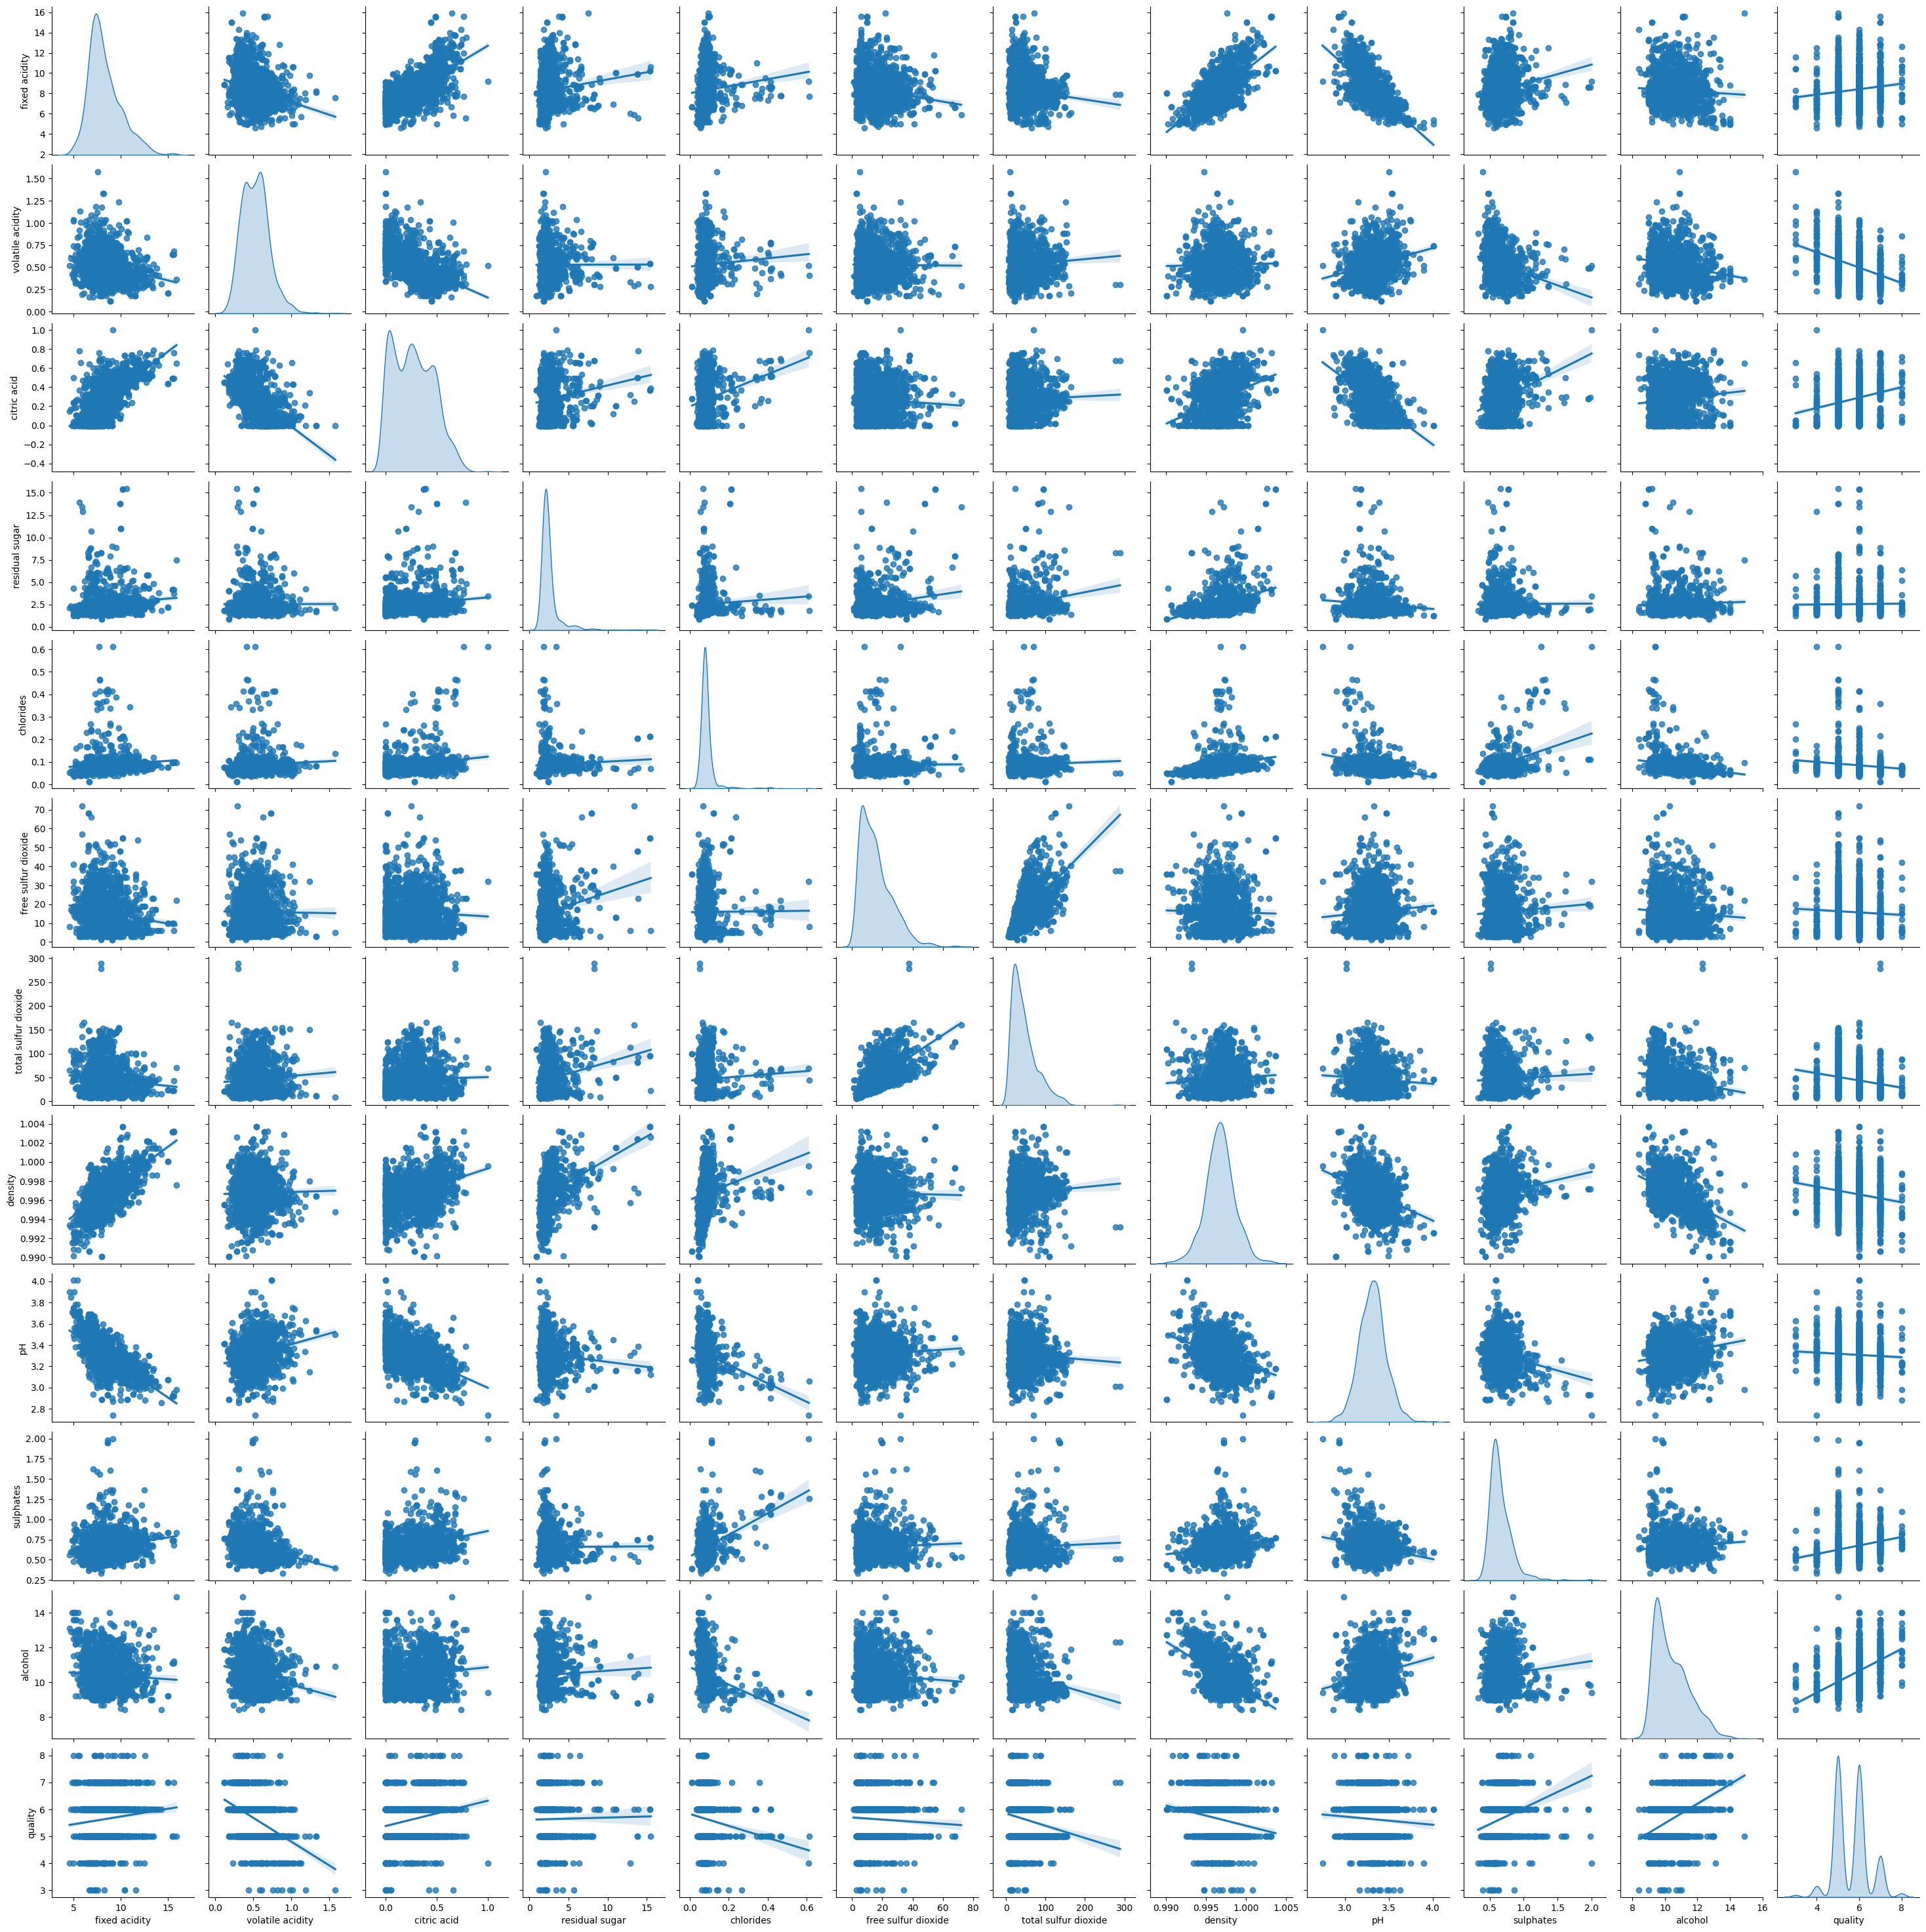

In [6]:
sns.pairplot(df, kind='reg',diag_kind='kde')

## Feature Engineering

In [103]:
df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
df['total_to_free_sulfur_dioxide_ratio'] = df['total sulfur dioxide'] / df['free sulfur dioxide']
df['acidity_index'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['chlorides_to_ph_ratio'] = df['chlorides'] / df['pH']
df['alcohol_to_pH_power'] = df['alcohol'] ** df['pH']

## Data Manipulations

#### Label Encoding for Target variables as there are only 6 types present

In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['quality_encoded'] = label_encoder.fit_transform(df['quality'])

In [105]:
X = df.drop(columns=['quality', 'quality_encoded'])
y = df['quality_encoded'] 
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Using the column “quality” as the target and all other columns as features

In [106]:
print("The Target labels are")
print(y)

The Target labels are
0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality_encoded, Length: 1599, dtype: int64


In [107]:
y.value_counts()

quality_encoded
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

### Split the dataset into train (70%), validation (15%) and test (15%)

In [108]:
from sklearn.model_selection import train_test_split

train_x, ee_x, train_y, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
train_x.shape

(1119, 16)

In [110]:
valid_x, test_x, valid_y, test_y = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)

In [111]:
test_x.shape

(240, 16)

In [112]:
valid_x.shape

(240, 16)

### Data Normalization for neural network

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

#### Convert the datatype of training, validation and test sets of float 64 to 32 bits so that can be handled by GPU

In [114]:
import torch

train_x, valid_x, test_x = map(torch.tensor, (train_x, valid_x, test_x))
train_y, valid_y, test_y = map(torch.tensor, (train_y.to_numpy(), valid_y.to_numpy(), test_y.to_numpy()))

In [115]:
train_x = train_x.float()
train_y = train_y.float()
valid_x = valid_x.float()
valid_y = valid_y.float()
test_x = test_x.float()
test_y = test_y.float()

In [116]:
train_x

tensor([[ 1.6954e-01, -1.7211e+00,  4.5930e-01,  ...,  3.7161e-02,
         -5.2836e-01,  6.3691e-01],
        [ 2.4461e+00, -4.0196e-01,  1.8411e+00,  ...,  2.4811e+00,
         -1.8916e-01, -8.0410e-01],
        [-6.4768e-01,  3.7747e-02, -1.2805e-03,  ..., -6.1124e-01,
         -1.2308e-01,  3.0046e-01],
        ...,
        [-6.4768e-01,  4.7745e-01, -1.0760e+00,  ..., -6.8328e-01,
         -3.0486e-01, -2.2439e-02],
        [-2.3907e-01, -1.8310e+00,  4.0813e-01,  ..., -3.6740e-01,
         -6.6774e-01,  4.5595e-01],
        [-1.4649e+00, -1.3363e+00, -5.2457e-02,  ..., -1.5312e+00,
         -5.1938e-01,  1.8950e+00]])

In [117]:
valid_x

tensor([[-0.4142,  0.8347, -0.2060,  ..., -0.3314,  0.5039, -0.6878],
        [-0.0056,  0.4225,  0.1522,  ...,  0.0538, -0.1277, -0.0299],
        [-0.9979,  1.0546, -0.9224,  ..., -0.9410,  0.5261,  0.0688],
        ...,
        [-0.6477,  0.2026, -1.1272,  ..., -0.7165, -0.1752, -0.0468],
        [ 0.9284,  0.3126, -1.0248,  ...,  0.8019,  0.2631, -0.3946],
        [ 0.7533, -0.1821,  0.4593,  ...,  0.7465,  0.6254, -0.3565]])

### Preparing the Data

In [118]:
from torch.utils.data import Dataset

class WineDataset(Dataset):
    def __init__(self, X, y):
        self.x = X
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

### Loading the dataset

In [119]:
train_data = WineDataset(train_x, train_y)
valid_data = WineDataset(valid_x, valid_y)
test_data = WineDataset(test_x, test_y)

In [120]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset= train_data, batch_size=8)

# Creating a basic MLP

In [121]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out      

In [122]:
model = WineMLP(16, 5, 6)
model

WineMLP(
  (fc1): Linear(in_features=16, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=6, bias=True)
  (relu): ReLU()
)

#### Optimizer as stochastic gradient descent (SGD) with learning rate of 0.0001 and momentum = 0.9

In [123]:
optimiser = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

#### loss function as corss entropy loss since trating it as a classification problem

In [124]:
criterion = torch.nn.CrossEntropyLoss()

### Training the Model

In [125]:
# Training and validation loop
epochs = 100

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())

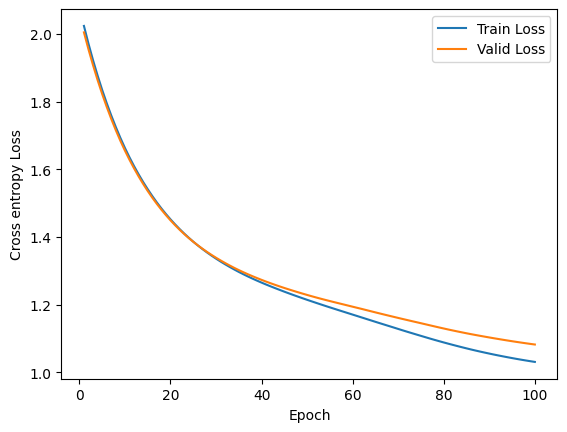

In [126]:
import matplotlib.pyplot as plt
import numpy as np

#epochs vs. train && epochs vs. validation

epochs = 100
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, valid_loss, label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross entropy Loss')
    plt.legend()
    plt.show()

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [127]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.5708333333333333


# Making changes to basic MLP

#### Increasing the number of epochs to 400

In [128]:
# Training and validation loop
model = WineMLP(16, 5, 6)
optimiser = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
epochs = 400
train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())

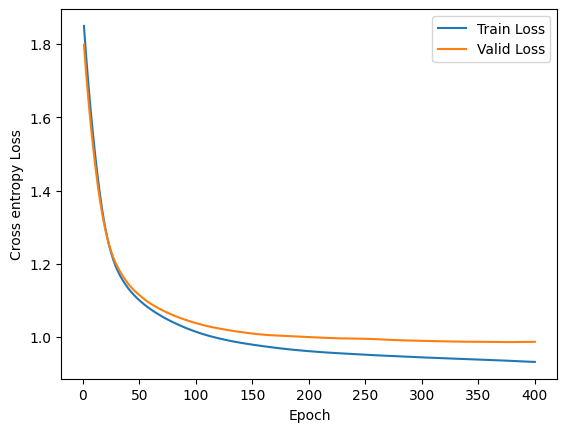

In [129]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [130]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.5791666666666667


#### Analysis: Not a big change but helped to visualize the loss curve better by increasing the number of epochs, validation loss decreases to below 1.0. But this is not enough we need to tune more hyperparameters. Tried with epochs = 300 amd epochs = 500, but did not get good accuracy scores, hence moving with epochs = 400.

#### Parameter to be tuned - Learning Rate by increasing it from 0.0001 to 0.001

In [131]:
# Training and validation loop
epochs = 400
model = WineMLP(16, 5, 6)
optimiser = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())

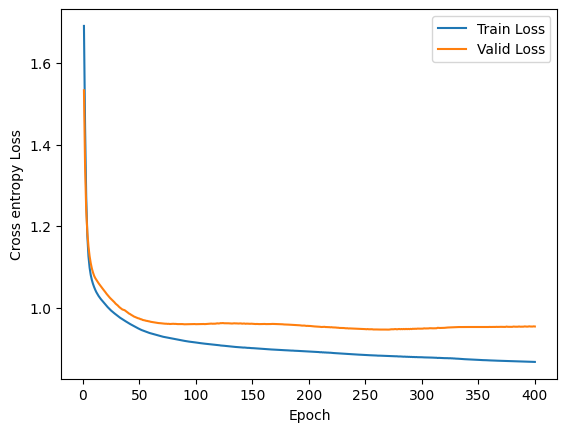

In [132]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [133]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.5708333333333333


#### Analysis: We observe that cross-entropy loss against epochs giving better results. training loss is always falling and improvement is slow (Validation accuracy increased by only 1%) and for validation loss is slightly higher but closely matching.

#### Parameter to be tuned - Altering Architectural element of the model - Adding one more hidden layer

In [134]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.hidden)
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out 

In [135]:
model = WineMLP(16, 5, 6)
model

WineMLP(
  (fc1): Linear(in_features=16, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=6, bias=True)
  (relu): ReLU()
)

In [136]:
epochs = 400
optimiser = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())
    #print('Epoch', epoch, 'train_loss', train_loss[-1], 'valid_loss', valid_loss[-1])

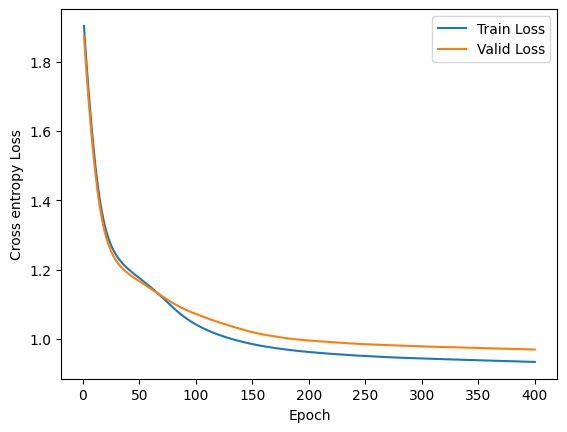

In [137]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [138]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.6


#### Analysis: Adding one more hidden layer improved the model improved teh model but not much stabilized. So we take our previous approach of 400 epochs and lr = 0.0001.

#### Parameter to be tuned - Altering Architectural element of the model - Increasing the nodes per layer from 5 to 7

In [139]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out      

In [140]:
# Training and validation loop
epochs = 400
model = WineMLP(16, 7, 6)
optimiser = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())

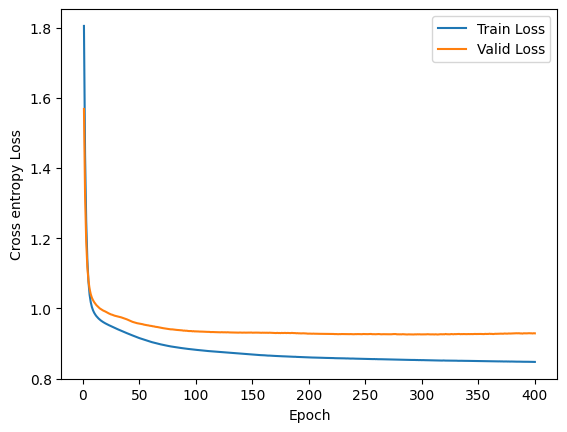

In [141]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [142]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.6125


#### Analysis: We observe that cross-entropy loss against epochs giving much better results. Improvement is good and for validation loss decreasing to almost 0.89. But valodation loss is slightly higher but closely matching. So we will continue to proceed with changes to our approach - Epochs = 500, LR = 0.001, Hidden layer with 7 units.

#### Also I tried with units = 6 and 8. With 8 hidden units, overfitting was observed and with 6 units, it was almost negligible improvement. Hence, chose 7 to proceed with.

#### Parameters to be tuned - Looks like a small bump or increase in validation loss from epoch - 300 to 400. We can try to change activation function from ReLU to LeakyReLU.

In [143]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.LeakyReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc3(out)
        return out 

In [144]:
model = WineMLP(16, 7, 6)
model

WineMLP(
  (fc1): Linear(in_features=16, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=6, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [145]:
epochs = 400
optimiser = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())
    valid_acc = (c == valid_y).sum().item()/valid_y.shape[0] 

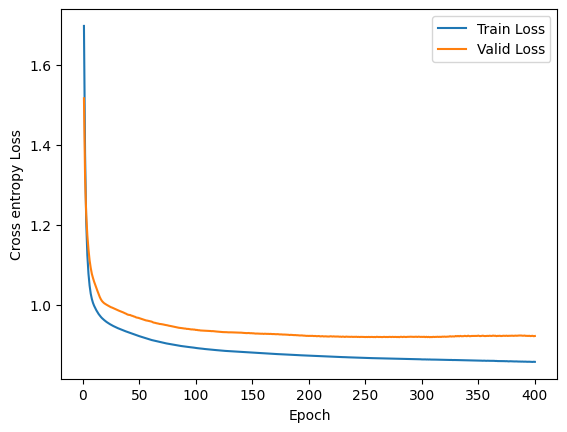

In [146]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [147]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

0.6291666666666667


#### Analysis: This action changing the activation function did help. Hence, we will go ahead with LeakyReLU as our activation function.

#### Parameters to be tuned- Now let's try with optimizer with Regularization and also 20 units in the hidden layer. I also tried with 10, 12, 15 and 25 units but they were not producing results.

In [166]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.hidden)
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out 

model = WineMLP(16, 7, 6)
model

WineMLP(
  (fc1): Linear(in_features=16, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=6, bias=True)
  (relu): ReLU()
)

In [ ]:
epochs =400
optimiser = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

train_loss = []
valid_loss = []

for epoch in range(epochs):
    # Training loop
    model.train()
    batch_loss = []
    
    for features, targets in train_loader:
        # Forward pass
        outputs = model.forward(features)  # Ensure features are in float32
        #targets = targets.long()  # Ensure targets are in long (int64)
        
        # Calculate loss
        loss = criterion(outputs, targets.long())
        batch_loss.append(loss.item())
        
        # Zero gradients
        optimiser.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimiser.step()

    #For each epoch 
    model.eval()
    #Triaining loss
    train_loss.append(sum(batch_loss)/len(batch_loss))
    #Valid loss, etc
    hyp_valid =  model.forward(valid_x)
    c = torch.argmax(hyp_valid, dim = 1)
    valid_loss.append(criterion(hyp_valid, valid_y.long()).item())
    valid_acc = (c == valid_y).sum().item()/valid_y.shape[0] 

In [ ]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [ ]:
hyp_test =  model.forward(test_x)
c = torch.argmax(hyp_test, dim = 1)
test_acc = (c == test_y).sum().item()/test_y.shape[0] 
print(test_acc)

#### Analysis: Adam Optimizer with Leaky RelU is performing good with combination of hidden layer.

### Hence, we can see that assuming it to be a classification problem, we see almost an increase of 8% in the test accuracy.